# Алгоритм t-SNE (Стохастическое вложение соседей с t-распределением)   



### 1. Вычисление вероятностей соседства

Для каждой пары точек $ i$  и  $j $ в исходном пространстве признаков вычисляются вероятности соседства $ P_{j|i} $ Эти вероятности вычисляются с использованием гауссовского распределения для оценки сходства между точками.

$$ P_{j|i} = \frac{{\exp(-||x_i - x_j||^2 / 2\sigma_i^2)}}{{\sum_{k \neq i} \exp(-||x_i - x_k||^2 / 2\sigma_i^2)}} $$

Здесь $ \sigma_i $ - это параметр ширины гауссовского ядра для точки $i $. Чем меньше значение $ \sigma_i $, тем более локализованным будет этот участок данных. Обычно выбирается целевое значение перплексии, и параметр ширины гауссовского ядра  $ \sigma_i $ настраивается таким образом, чтобы среднее число ближайших соседей каждой точки было близким к этому целевому значению.

### 2.  Переход в пространство меньшей размерности
### Обновление координат точек в новом пространстве

#### Шаг 1: Инициализация начальных координат

Пусть $Y = \{y_1, y_2, \dots, y_N\}$ представляет собой начальное распределение точек в пространстве новой размерности, где $N$ - количество точек.

#### Шаг 2: Вычисление попарных условных вероятностей соседства

Попарные условные вероятности соседства $q_{ij}$ между точками в пространстве новой размерности вычисляются с использованием функции:

$$ q_{ij} = \frac{{(1 + ||y_i - y_j||^2)^{-1}}}{{\sum_{k \neq l} (1 + ||y_k - y_l||^2)^{-1}}} $$

#### Шаг 3: Вычисление градиента функции Кульбака-Лейблера

Градиент функции Кульбака-Лейблера между распределениями $P_{j|i}$ и $q_{ij}$ по координатам точек в пространстве новой размерности вычисляется как:

$$\frac{{\partial C}}{{\partial y_i}} = 4 \sum_j (P_{j|i} - q_{ij}) (y_i - y_j) (1 + ||y_i - y_j||^2)^{-1}$$

#### Шаг 4: Обновление координат точек

Координаты точек $y_i$ обновляются в направлении, противоположном градиенту функции Кульбака-Лейблера, с использованием оптимизационного метода, например, градиентного спуска:

$$y_i := y_i - \eta \frac{{\partial C}}{{\partial y_i}}$$

где $\eta$ - скорость обучения.


Шаги 2-4 повторяются до достижения сходимости






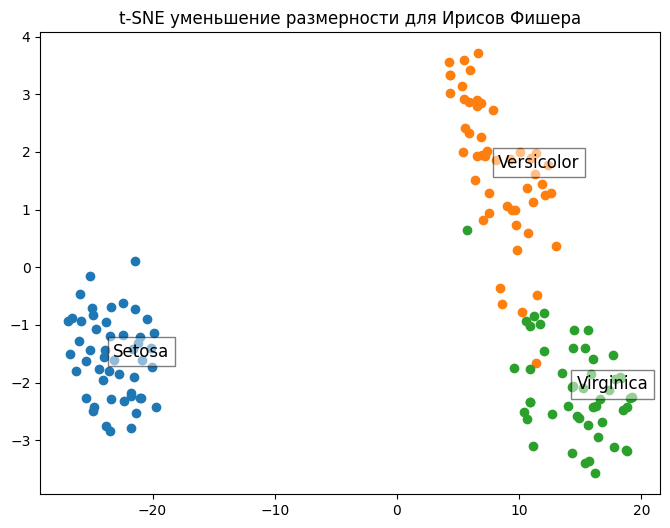

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE

iris = load_iris()
X = iris.data
y = iris.target

tsne = TSNE(n_components=2, random_state=40)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1])

class_names = ['Setosa', 'Versicolor', 'Virginica']
for i, class_name in enumerate(class_names):
    plt.text(X_tsne[y == i, 0].mean(), X_tsne[y == i, 1].mean(), class_name, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.title('t-SNE уменьшение размерности для Ирисов Фишера')
plt.show()

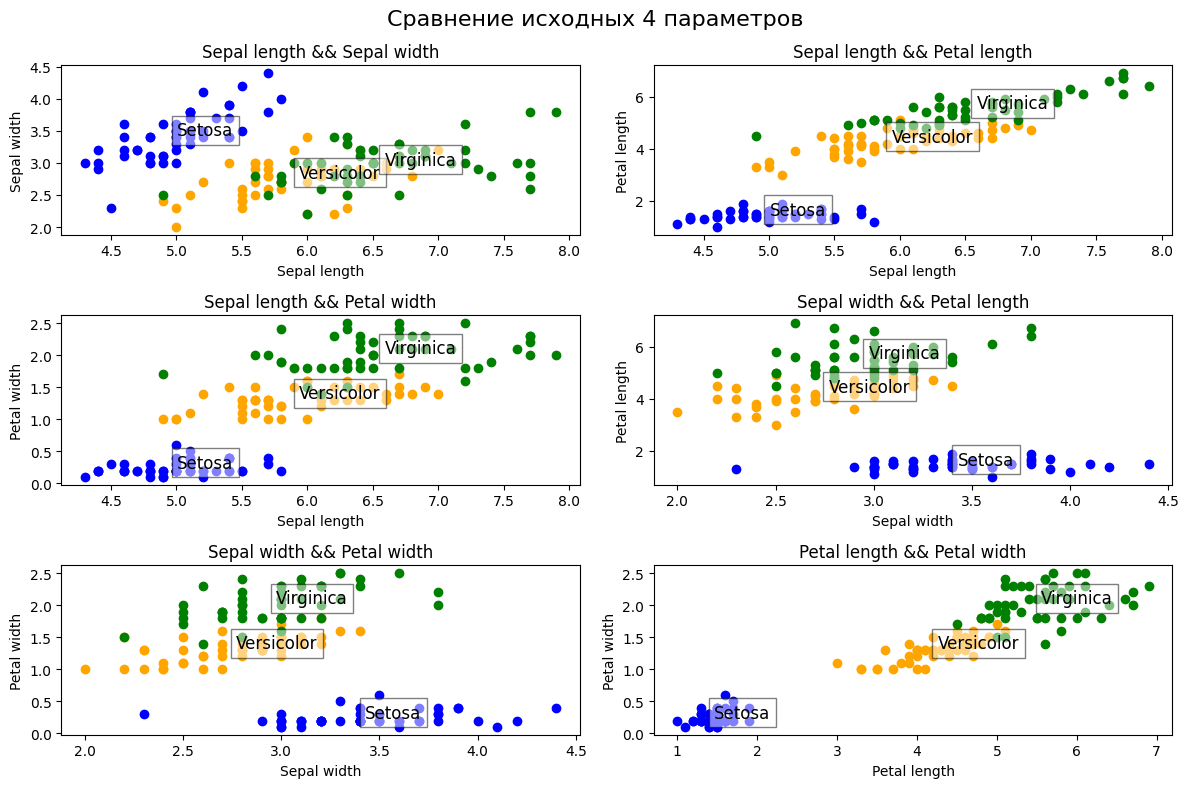

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

parameters = [(0, 1), (0, 2), (0, 3), (1, 2), (1,3), (2,3)]
parameter_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

colors = ['blue', 'orange', 'green']

for i, (x_param, y_param) in enumerate(parameters):
    ax = axes[i // 2, i % 2]
    for j in range(len(colors)):
        ax.scatter(X[y == j, x_param], X[y == j, y_param], c=colors[j])
    ax.set_xlabel(parameter_names[x_param])
    ax.set_ylabel(parameter_names[y_param])
    ax.set_title(f'{parameter_names[x_param]} && {parameter_names[y_param]}')
    class_names = ['Setosa', 'Versicolor', 'Virginica']
    for j, class_name in enumerate(class_names):
        ax.text(X[y == j, x_param].mean(), X[y == j, y_param].mean(), class_name, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.suptitle('Сравнение исходных 4 параметров', fontsize=16)
plt.tight_layout()
plt.show()
